In [1]:
# importing section
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import thinkstats2
import thinkplot

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data = pd.read_csv("C:/Users/nbaga/dsc530/Car_data.csv", names = cols)
data.shape

(205, 26)

In [3]:
data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Data wrangling
data = data.replace('?', np.NaN)

In [5]:
avg_norm_loss = data['normalized-losses'].astype('float').mean()
print("The average is {}".format(avg_norm_loss))
data["normalized-losses"].replace(np.NaN, avg_norm_loss, inplace = True)

The average is 122.0


In [6]:
#Bore Values
avg_bore = data['bore'].astype('float').mean()
data['bore'].replace(np.NaN, avg_bore, inplace = True)

#Stroke Values
avg_stroke = data['stroke'].astype('float').mean(axis = 0)
data['stroke'].replace(np.nan, avg_stroke, inplace = True)

#horsepower Values 
avg_horsepower = data['horsepower'].astype('float').mean(axis=0)
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#Peak RPM 
avg_peakrpm= data['peak-rpm'].astype('float').mean(axis=0)
data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

#Peak RPM 
avg_peakrpm= data['price'].astype('float').mean(axis=0)
data['price'].replace(np.nan, avg_peakrpm, inplace=True)

In [7]:
# Finding the missing values
data.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [8]:
# Finding if missing values 
data.isnull().any() 

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

# Mean of all variables in the data set

In [9]:
print(data.mean())

symboling               0.834146
wheel-base             98.756585
length                174.049268
width                  65.907805
height                 53.724878
curb-weight          2555.565854
engine-size           126.907317
compression-ratio      10.142537
city-mpg               25.219512
highway-mpg            30.751220
dtype: float64


C:\Users\nbaga\AppData\Local\Temp/ipykernel_104292/2101390418.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())


In [10]:
print(data.mode())

   symboling normalized-losses    make fuel-type aspiration num-of-doors  \
0        0.0             122.0  toyota       gas        std         four   
1        NaN               NaN     NaN       NaN        NaN          NaN   

  body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0      sedan          fwd           front        94.5  ...           92   
1        NaN          NaN             NaN         NaN  ...          122   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.62     3.4               9.0         68      5500     31.0   
1          NaN   NaN     NaN               NaN        NaN       NaN      NaN   

  highway-mpg         price  
0        25.0  13207.129353  
1         NaN           NaN  

[2 rows x 26 columns]


In [11]:
##Converting mpg to L/100km and checking the data type of each column.

# converting mpg to L / 100km
data['city-mpg'] = 235 / data['city-mpg']
data.rename(columns = {'city_mpg': "city-L / 100km"}, inplace = True)
  
print(data.columns)  
# checking the data type of each column
data.dtypes 

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                 object
dtype: object

In [12]:
# the data contains '?', so we Drop it
data = data[data.price != '?']
 
# Chnage datatypes of columns
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")






0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 205, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


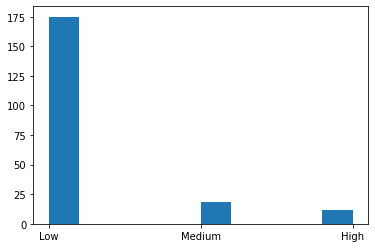

In [13]:
## Normalizing the values

data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()
  
# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4) 
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins, 
                              labels = group_names, 
                              include_lowest = True)
  
print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()


all cars Price outlier : 29055.684577114433


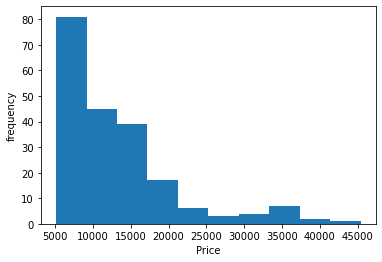

In [64]:
## Plot hist for Price of all car models

plt.hist(data['price'])

plt.xlabel('Price')
plt.ylabel('frequency')

### mean of all cars price

all_car_price_mean=data['price'].mean()

## calculate the outlier of all cars prices

outlier=all_car_price_mean * 2.2  ## 2.2 times above or below mean is a outlier(took 2.2 to avoid type 1 errors)

print('all cars Price outlier :',outlier)

## I feel these are valid outliners as the data contains different models of cars so the price vary between those models



Toyota cars Price outlier : 21748.787500000002


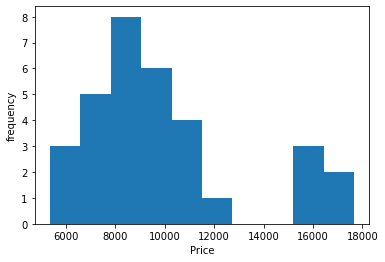

In [65]:
## Lets take price for toyota model to see if the outlier is true

df_car = data[data['make']=='toyota']
df_car
plt.hist(df_car['price'])
plt.xlabel('Price')
plt.ylabel('frequency')


toyota_car_mean = df_car['price'].mean()

toyota_price_outlier = toyota_car_mean * 2.2

print('Toyota cars Price outlier :',toyota_price_outlier)

In [16]:
## Based on the above Histogram, there are no outlier, because outlier is any value grater than 21748.787500000002
## Hence no Outliers in price.

all cars engine-size outlier : 279.1960975609756


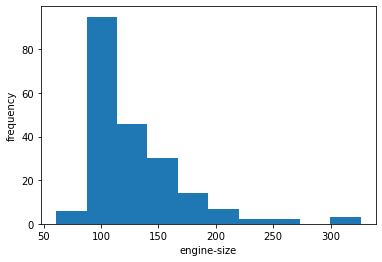

In [66]:
plt.hist(data['engine-size'])
### mean of all cars engine-size
plt.xlabel('engine-size')
plt.ylabel('frequency')

all_car_engine_size_mean=data['engine-size'].mean()

## calculate the outlier of all cars prices

outlier=all_car_engine_size_mean * 2.2  ## 2.2 times above or below mean is a outlier(took 2.2 to avoid type 1 errors)

print('all cars engine-size outlier :',outlier)

## I feel these are valid outliners as the data contains different models of cars so the engine size vary between 
## those models



Toyota cars engine-size outlier : 261.38750000000005


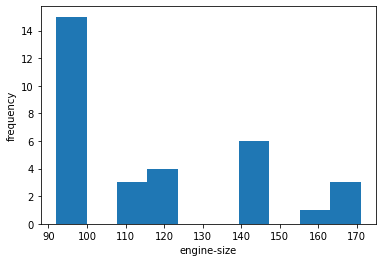

In [67]:
## Lets take engine-size for toyota model to see if the outlier is true


plt.hist(df_car['engine-size'])
plt.xlabel('engine-size')
plt.ylabel('frequency')

toyota_car_mean = df_car['engine-size'].mean()

toyota_engine_size_outlier = toyota_car_mean * 2.2

print('Toyota cars engine-size outlier :',toyota_engine_size_outlier)

In [19]:
## Based on the above Histogram, there are no outlier, because outlier is any value grater than 261.38750000000005
## Hence no Outliers in engine-size.

all cars highway-mpg outlier : 67.65268292682927


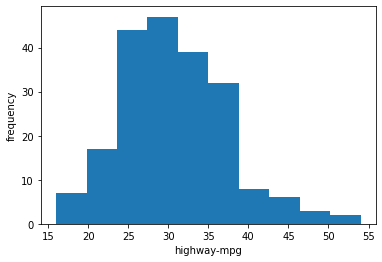

In [68]:
## Plot Hist for all cars highway-mpg

plt.hist(data['highway-mpg'])

plt.xlabel('highway-mpg')
plt.ylabel('frequency')
### mean of all cars engine-size

all_car_highway_mpg_mean=data['highway-mpg'].mean()

## calculate the outlier of all cars prices

outlier=all_car_highway_mpg_mean * 2.2  ## 2.2 times above or below mean is a outlier(took 2.2 to avoid type 1 errors)

print('all cars highway-mpg outlier :',outlier)

## I feel these are valid outliners as the data contains different models of cars so the highway-mpg vary between 
## those models


Toyota cars highway-mpg outlier : 72.39375000000001


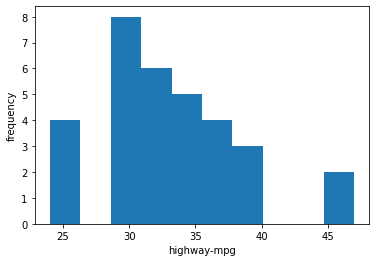

In [69]:
## Lets take highway-mpg for toyota model to see if the outlier is true



plt.hist(df_car['highway-mpg'])
plt.xlabel('highway-mpg')
plt.ylabel('frequency')

toyota_car_mean = df_car['highway-mpg'].mean()

toyota_highway_mpg_outlier = toyota_car_mean * 2.2

print('Toyota cars highway-mpg outlier :',toyota_highway_mpg_outlier)

In [22]:
## Based on the above Histogram, there are no outlier, because outlier is any value grater than 72.39375000000001
## Hence no Outliers in highway-mpg.

all cars peak-rpm outlier : 11275.812807881774


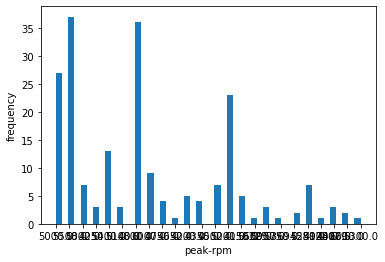

In [70]:
plt.hist(data['peak-rpm'].astype(str), bins=50)
plt.xlabel('peak-rpm')
plt.ylabel('frequency')

### mean of all cars engine-size

all_car_peak_rpm_mean=data['peak-rpm'].mean()

## calculate the outlier of all cars prices

outlier=all_car_peak_rpm_mean * 2.2  ## 2.2 times above or below mean is a outlier(took 2.2 to avoid type 1 errors)

print('all cars peak-rpm outlier :',outlier)

## I feel these are valid outliners as the data contains different models of cars so the peak-rpm vary between 
## those models

Toyota cars peak-rpm outlier : 10690.625


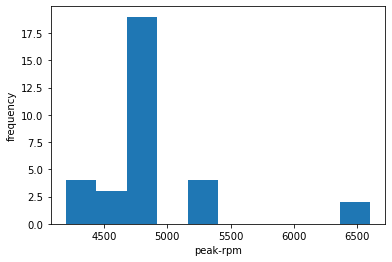

In [71]:
## Lets take peak-rpm for toyota model to see if the outlier is true

df_car = data[data['make']=='toyota']

plt.hist(df_car['peak-rpm'])

plt.xlabel('peak-rpm')
plt.ylabel('frequency')

toyota_car_mean = df_car['peak-rpm'].mean()

toyota_peak_rpm_outlier = toyota_car_mean * 2.2

print('Toyota cars peak-rpm outlier :',toyota_peak_rpm_outlier)

In [25]:
## Based on the above Histogram, there are no outlier, because outlier is any value grater than 10690.625
## Hence no Outliers in peak-rpm.

In [110]:
data['price'].max() - df_car['price']

150    40052.0
151    39062.0
152    38912.0
153    38482.0
154    37502.0
155    36622.0
156    38462.0
157    38202.0
158    37502.0
159    37612.0
160    37662.0
161    37042.0
162    36142.0
163    37342.0
164    37162.0
165    36102.0
166    35862.0
167    36951.0
168    35761.0
169    35411.0
170    34201.0
171    33851.0
172    27731.0
173    36452.0
174    34702.0
175    35412.0
176    34502.0
177    34152.0
178    28842.0
179    29402.0
180    29710.0
181    29650.0
Name: price, dtype: float64

Text(0, 0.5, 'frequency')

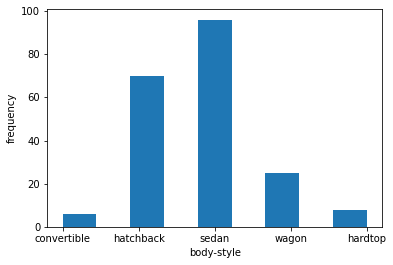

In [72]:
plt.hist(data["body-style"],bins=9)

plt.xlabel('body-style')
plt.ylabel('frequency')

## There is only 5 values, so there are no outliners in the data

# compare two scenarios in your data using a PMF

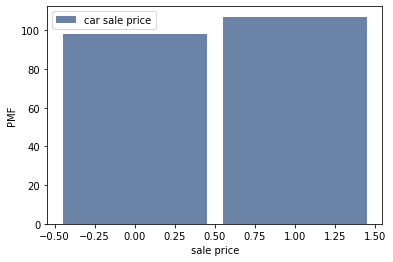

In [27]:
SALE_PRC_hist = thinkstats2.Hist(data['price']>(10000), label='car sale price')
pmf = SALE_PRC_hist.Copy()
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='sale price', ylabel='PMF')


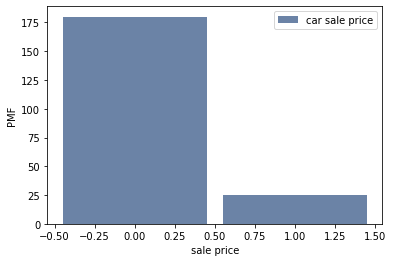

In [28]:
SALE_PRC_hist = thinkstats2.Hist(data['price']>(20000), label='car sale price')
pmf = SALE_PRC_hist.Copy()
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='sale price', ylabel='PMF')


# CDF

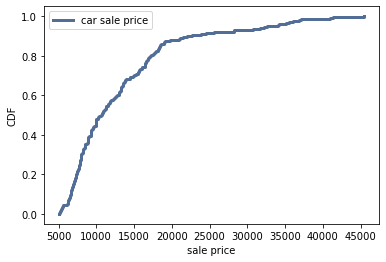

In [29]:
# WITH ALL CARS DATA

cdf = thinkstats2.Cdf(data['price'], label='car sale price')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='sale price', ylabel='CDF', loc='upper left')


In [30]:
## the above shows that 90% out of all model cars are sold for more than $18000

C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Symboling Histogram'}, xlabel='symboling', ylabel='count'>

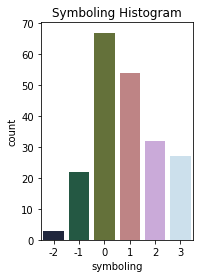

In [113]:
plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data['symboling'], palette=("cubehelix"))


In [ ]:
## It seems that the symbolling with 0 and 1 values are most sold cars

<AxesSubplot:title={'center':'Symboling vs Price'}, xlabel='symboling', ylabel='price'>

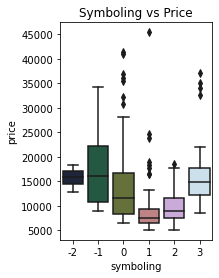

In [116]:
plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=data['symboling'], y=data['price'], palette=("cubehelix"))

In [117]:
#The cars with -1 symboling seems to be high priced.
#But it seems that symboling with 3 value has the price range similar to -2 value. 
# There is a dip in price at symboling 1.

In [33]:
# categorical to numerical variables
pd.get_dummies(data['fuel-type']).head()
  
# descriptive analysis
# NaN are skipped
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,10.142537,5125.369458,9.949525,30.751220,13207.129353
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,3.972040,476.979093,2.573104,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,4.795918,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,4800.000000,7.833333,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,5200.000000,9.791667,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,12.368421,34.000000,16500.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,18.076923,54.000000,45400.000000


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

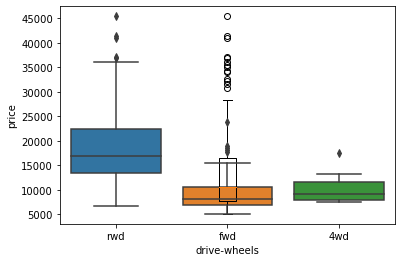

In [34]:
##Plotting the data according to the price based on engine size.

plt.boxplot(data['price'])
  
# by using seaborn
sns.boxplot(x ='drive-wheels', y ='price', data = data)  


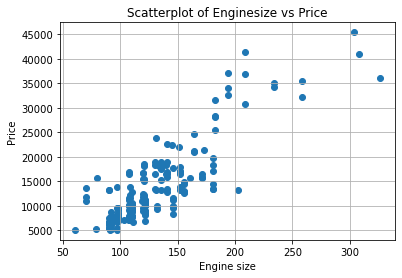

In [35]:
# Predicting price based on engine size
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
## it seems that bigger Engine size cars are costliest

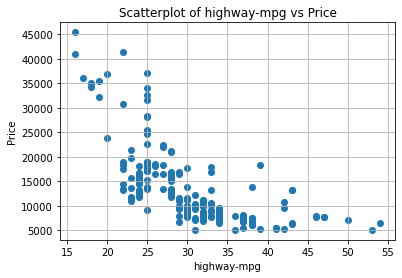

In [36]:
# Predicting price based on highway-mpg
plt.scatter(data['highway-mpg'], data['price'])
plt.title('Scatterplot of highway-mpg vs Price')
plt.xlabel('highway-mpg')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
## It seems High milage cars are not expensive

In [37]:
##Grouping the data according to wheel, body-style and price.

# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'], 
                         as_index = False).mean()
  
data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [38]:
data[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio
bore,1.000000,-0.055909,0.005201
stroke,-0.055909,1.000000,0.186105
compression-ratio,0.005201,0.186105,1.000000


(0.0, 52095.217709973294)

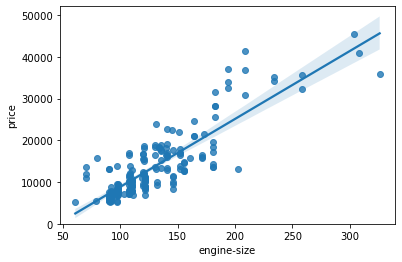

In [39]:

##In order to start understanding the (linear) relationship between an individual variable and the price.
##We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.
##As the slope is increasing in a positive direction, it is a positive linear relationship. 
# Correlation-measures dependency, not causation
sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0, )

(0.0, 48131.80810933888)

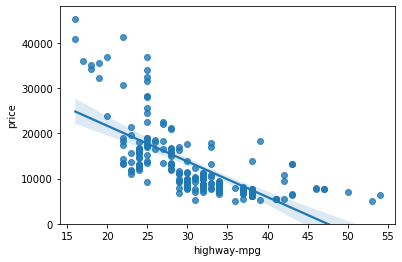

In [40]:
## Highway mpg is also a potential predictor variable of price
sns.regplot(x ='highway-mpg', y ='price', data = data)
plt.ylim(0, )

In [41]:
##There seems to be an inverse relationship.

In [42]:
data['highway-mpg'].corr(data['price'])

-0.6905257341183495

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

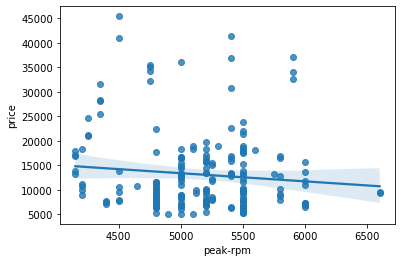

In [43]:
## See if "Peak-rpm" as a predictor variable of "price".
sns.regplot(x = 'peak-rpm', y = 'price', data = data)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616

In [44]:
data['peak-rpm'].corr(data['price'])

-0.10085406591169101

Categorical variables
Let's look at the relationship between "body-style" and "price".


<AxesSubplot:xlabel='body-style', ylabel='price'>

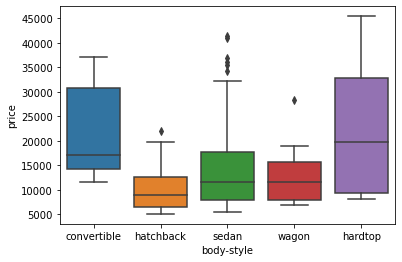

In [45]:
sns.boxplot(x = 'body-style', y = 'price', data = data)

# Pearson Correlation

In [46]:
data['drive-wheels'].unique()
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.273679,0.063165,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.237748,0.232682,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,-0.360704,0.474040,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,-0.287031,0.659165,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,-0.219859,0.682850,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.320602,-0.002333,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,-0.266283,0.791911,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,-0.244599,0.744952,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,-0.254761,0.555960,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,-0.066844,0.042550,-0.043961,0.082095


In [47]:
## Calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

pearson_coef, p_value = sp.stats.pearsonr(data['wheel-base'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5831681499789547  with a P-value of P = 4.527625545686765e-20


In [48]:
##Since the p-value is > 0.001, there is no evidence that the correlation is significant between wheel-base and price
## also the linear relationship isn't extremely strong (~0.585)

In [49]:
pearson_coef, p_value = sp.stats.pearsonr(data['horsepower'].astype('float'), data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7579169537498177  with a P-value of P =  1.6076703978130332e-39


# HYPOTHESIS TESTING using ANOVA

# ANOVA: Analysis of Variance
##The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences
##between the means of two or more groups. ANOVA returns two parameters:

##F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

##P-value: P-value tells how statistically significant is our calculated score value.

##If our price variable is strongly correlated with the variable we are analyzing, 
##expect ANOVA to return a sizeable F-test score and a small p-value.

##Drive Wheels
##Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

the p-value is  <  0.05: there is moderate evidence that the correlation is significant.

the p-value is  <  0.1: there is weak evidence that the correlation is significant.

the p-value is  >  0.1: there is no evidence that the correlation is significant.

### Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [50]:


# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by 
# variation within sample group
# p-value = confidence degree

data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)
  
# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value


F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


In [51]:
## few more ANOVA testing
# grouping results
gptest = data[['drive-wheels','body-style','price']]
grouped_test1 = gptest.groupby(['drive-wheels','body-style'], as_index = False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [52]:
grouped_test2 = gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.000000
1,rwd,16500.000000
3,fwd,13950.000000
4,4wd,17450.000000
5,fwd,15250.000000
9,4wd,13207.129353


In [53]:
data.describe(include = ['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower
count,205,205,205,203,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8,60
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,68
freq,32,185,168,114,96,120,202,148,159,94,19


In [54]:
# ANOVA
f_val, p_val = sp.stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.5036668266912 , P = 3.5392707916047903e-23


In [55]:
f_val, p_val = sp.stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 129.41115759339715 , P = 2.6524240289951807e-23


In [56]:
f_val, p_val = sp.stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.879065438652509 , P = 0.00378273257813761


In [57]:
## Based on the above p value there is moderate evidence that the correlation is significant

In [58]:
f_val, p_val = sp.stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F =", f_val, ", P =", p_val) 

ANOVA results: F = 1.1847736755700735 , P = 0.27844756008434524


In [59]:
## Based on the above p value there is no evidence that the correlation is significant.

In [60]:
#We now have a better idea of what our data looks like and which variables are important to take into account
#when predicting the car price. We have narrowed it down to the following variables:

#Length
#Width
#Curb-weight
#Engine-size
#Horsepower
#City-mpg
#Highway-mpg
#Wheel-base
#Bore